## Observations and Insights 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)






In [66]:

# Combine the data into a single dataset
mouse_df=pd.DataFrame(mouse_metadata)
mouse_df
study_results_df=pd.DataFrame(study_results)
study_results
combined_df=pd.merge(mouse_df, study_results_df, how='outer')

# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
#check number of mice
mouse_count=combined_df['Mouse ID'].value_counts()
mouse_count=len(mouse_count)
mouse_count

249

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_mouse_dups=combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
find_mouse_dups
mouse_dups=pd.DataFrame(find_mouse_dups)
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dups

,0
0,g989


In [69]:
combined_no_dups=combined_df.drop_duplicates(subset=['Mouse ID'],keep=False)
combined_no_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df[combined_df['Mouse ID'].isin(find_mouse_dups)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice in the clean DataFrame.
clean_mouse=clean_df['Mouse ID'].value_counts()
clean_mouse
clean_mouse_number=len(clean_mouse)
clean_mouse_number

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_mean=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_regimen_mean

drug_regimen_median=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_regimen_median

drug_regimen_variance=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_regimen_variance

drug_regimen_std=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_regimen_std

drug_regimen_sem=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
drug_regimen_sem

# Assemble the resulting series into a single summary dataframe.
regimen_summary_df=pd.DataFrame({'Mean':drug_regimen_mean,
                                'Median':drug_regimen_median,
                                'Variance':drug_regimen_variance,
                                'Standard Deviation':drug_regimen_std,
                                'SEM':drug_regimen_sem})
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimens=clean_df.groupby('Drug Regimen')
regimen_summary_2 = regimens.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
regimen_summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

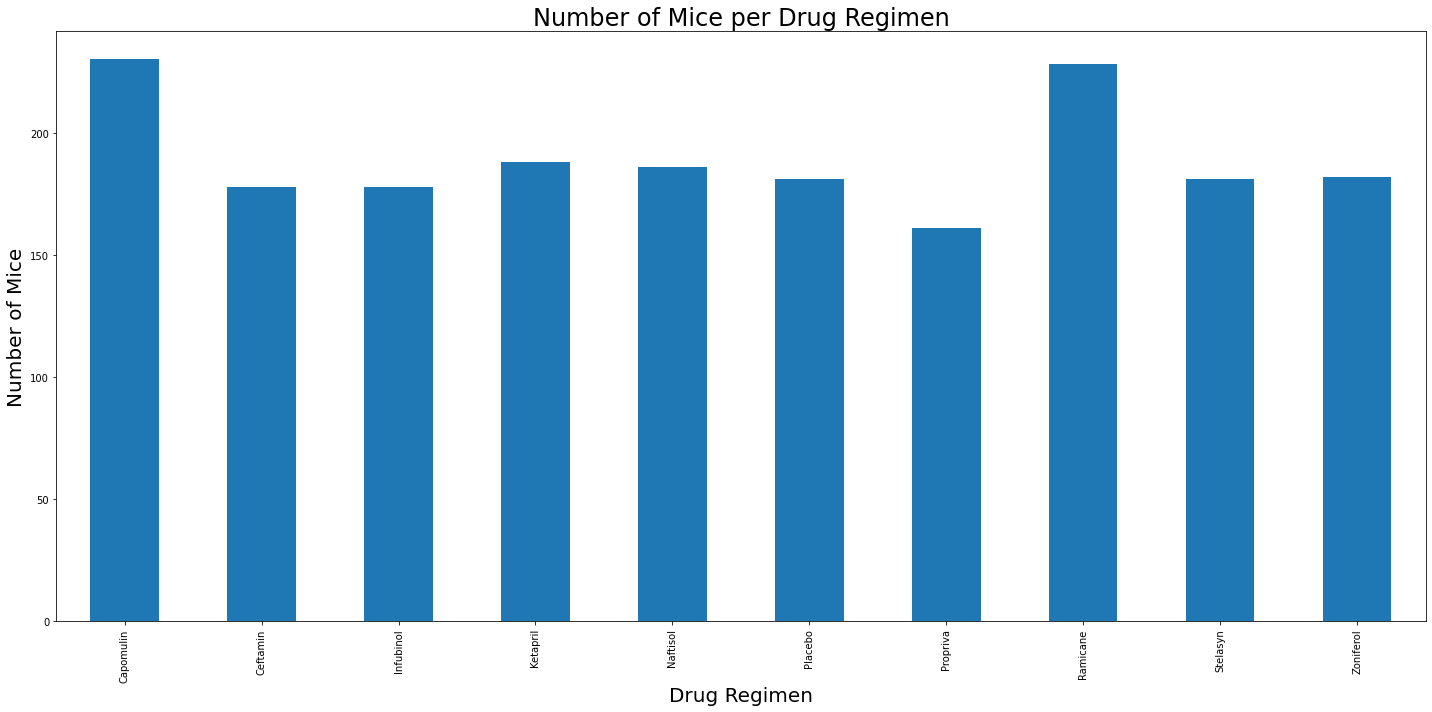

In [158]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_treatment_=clean_df.groupby(['Drug Regimen','Mouse ID'])
mice_treatment

#treatment_bar_pda=pd.DataFrame(mice_treatment)
#treatment_bar_pda
treatment_bar_pda=mice_treatment.plot(kind='bar',figsize=(20,10))
plt.xlabel("Drug Regimen", fontsize=20)
plt.ylabel("Number of Mice",fontsize=20)
plt.title("Number of Mice per Drug Regimen", fontsize=24)
plt.tight_layout()
plt.show()

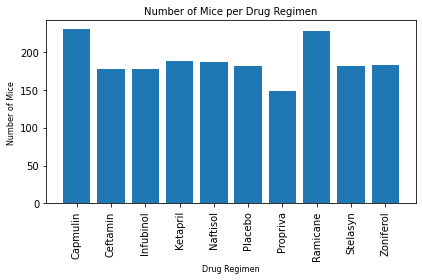

In [159]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_count_lt=clean_df.groupby(['Drug Regimen'])['Mouse ID'].count().agg(list)
mice_count_lt

x_axis=np.arange(len(mice_count_lt))

#creates list of drugs treatments for the x-axis
x_label= ['Capmulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

y_axis=mice_count_lt

#assigns chart elements

plt.xticks(x_axis, x_label, rotation='vertical')
plt.xlabel("Drug Regimen", fontsize=8)
plt.ylabel("Number of Mice",fontsize=8)
plt.title("Number of Mice per Drug Regimen", fontsize=10)
plt.tight_layout()
plt.bar(x_axis,y_axis,align='center')
plt.show()

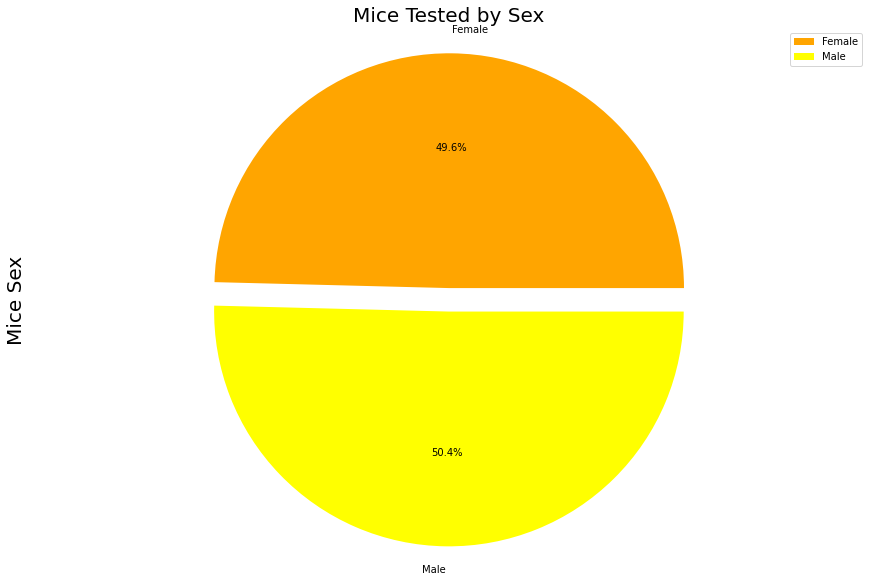

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#groupby the mouse id and gender 
mice_gender_gb=clean_df.groupby(['Mouse ID','Sex'])
mice_gender_gb
mice_gender_df=pd.DataFrame(mice_gender_gb.size())
mice_gender_df

#count the number of mice per gender
mice_gender_pda=pd.DataFrame(mice_gender_df.groupby(['Sex']).count())
mice_gender_pda
mice_gender_pda.columns=['Mice Total Count']
mice_gender_pda

mice_gender_pda["Percentage"] = (100*(mice_gender_pda["Mice Total Count"]/mice_gender_pda["Mice Total Count"].sum()))

# format the "Percentage of Sex" column
mice_gender_pda["Percentage"] = mice_gender_pda["Percentage"]

#make pie plot
colors=['orange','yellow']
explode=(0.1,0)
mice_gender_pie=mice_gender_pda.plot(kind='pie',y='Mice Total Count',figsize=(15,10),colors=colors, explode = explode,autopct="%1.1f%%")
plt.ylabel('Mice Sex', fontsize=20)
plt.title('Mice Tested by Sex',fontsize=20)
plt.axis('equal')
plt.show()

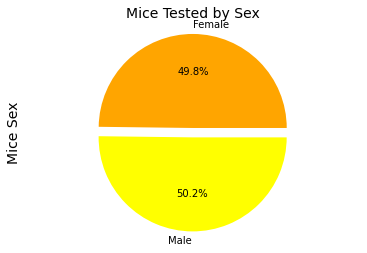

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=['Female','Male']

sizes=[49.8,50.2]

colors=['orange','yellow']

explode=(0.1,0)

plt.pie(sizes,explode=explode,colors=colors, labels=labels, autopct="%1.1f%%")

plt.ylabel('Mice Sex', fontsize=14)
plt.title('Mice Tested by Sex',fontsize=14)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]

all_drugs_df=pd.merge(capomulin_df,ramicane_df, how='outer')
all_drugs_df=pd.merge(all_drugs_df, ceftamin_df, how='outer')
all_drugs_df=pd.merge(all_drugs_df, infubinol_df, how='outer')


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = all_drugs_df.groupby(all_drugs_df['Mouse ID']).agg({'Timepoint':['max']})
greatest_timepoint.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint=greatest_timepoint.reset_index()
tumor_volume_df=pd.merge(greatest_timepoint,all_drugs_df, how='left', on=["Mouse ID", "Timepoint"])
#tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [185]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    vol_drug= tumor_volume_df['Tumor Volume (mm3)'].loc[tumor_volume_df['Drug Regimen'] == drug]
# b. add subset 
    tumor_vol_data.append(vol_drug)
# c. Determine outliers using upper and lower bounds
    quartiles = vol_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

    #check to see if volumes were added to list appropriately
tumor_vol_data    

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

C:\Users\ravjo\AppData\Local\Temp/ipykernel_19308/3410781259.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_list)


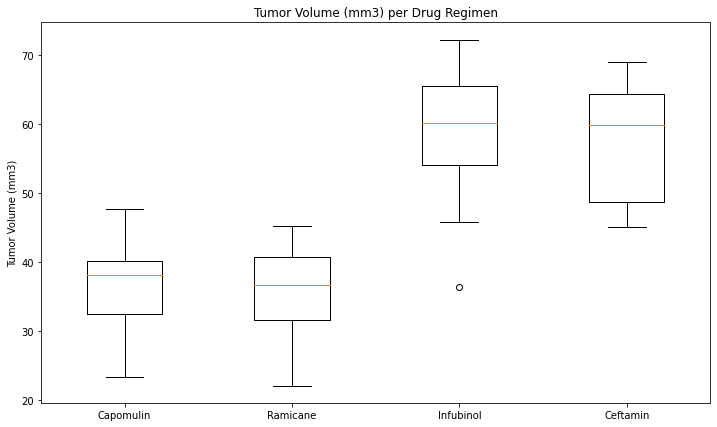

In [195]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Tumor Volume (mm3) per Drug Regimen')
ax.set_xticklabels(drug_list)

ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

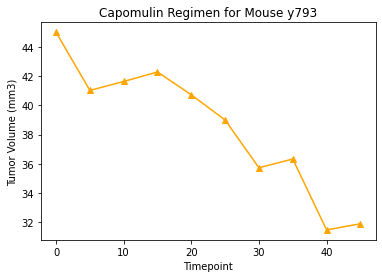

In [199]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = clean_df[['Timepoint', 'Tumor Volume (mm3)']].loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID']=='y793')]
mouse_data

# plot data
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='^', color='orange')
plt.title("Capomulin Regimen for Mouse y793")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

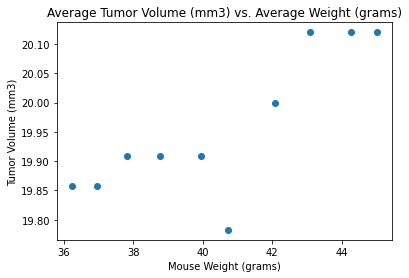

In [207]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].groupby(clean_df['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
avg_weight.columns = ['Average Tumor Volume (mm3)', 'Average Weight (g)']
avg_weight

avg_tum_vol = avg_weight['Average Tumor Volume (mm3)']
avg_wg= avg_weight['Average Weight (g)']

plt.title('Average Tumor Volume (mm3) vs. Average Weight (grams)')
plt.xlabel('Mouse Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')

plt.scatter(avg_tum_vol,avg_wg)
plt.show()

## Correlation and Regression

In [234]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

x_axis = avg_weight['Average Tumor Volume (mm3)']
y_axis= avg_weight['Average Weight (g)']


corr = st.pearsonr(x_axis,y_axis)
print(f'The correlation between mouse weight and average tumor volume is {round(r_value[0],2)}')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue:{rvalue}")
print(f"correlation coefficient:{corr}")
print(f"stderr:{stderr}")


The correlation between mouse weight and average tumor volume is 0.82
The linear regression equation is y = 0.03x + 18.61
slope:0.033194142291055447
intercept:18.614549073849066
rvalue:0.8207292487213745
correlation coefficient:(0.8207292487213746, 0.003617385703547253)
stderr:0.008169471286193736


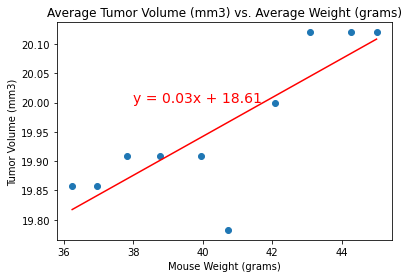

In [227]:
# plot line with scatter

plt.title('Average Tumor Volume (mm3) vs. Average Weight (grams)')
plt.xlabel('Mouse Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')

plt.scatter(x_axis,y_axis)

# calculate regression values
regression_data = x_axis * slope + intercept
plt.plot(x_axis, regression_data, "r-")
plt.annotate(line_eq,(38,20),fontsize=14,color="red")

plt.show()